In [ ]:
# multiclass classification
import pandas
import xgboost
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
# load data
data = pandas.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv', header=None)
dataset = data.values
# split data into X and y
X = dataset[:,0:4]
Y = dataset[:,4]
# encode string class values as integers
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(Y)
label_encoded_y = label_encoder.transform(Y)
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, label_encoded_y, test_size=test_size, random_state=seed)
# fit model no training data
model = xgboost.XGBClassifier()
model.fit(X_train, y_train)
print(model)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
Accuracy: 92.00%


In [ ]:
# binary classification, breast cancer dataset, label and one hot encoded
import numpy
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# load data
data = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv', header=None)
dataset = data.values
# split data into X and y
X = dataset[:,0:9]
X = X.astype(str)
Y = dataset[:,9]
# encode string input values as integers
encoded_x = None
for i in range(0, X.shape[1]):
	label_encoder = LabelEncoder()
	feature = label_encoder.fit_transform(X[:,i])
	feature = feature.reshape(X.shape[0], 1)
	onehot_encoder = OneHotEncoder(sparse=False, categories='auto')
	feature = onehot_encoder.fit_transform(feature)
	if encoded_x is None:
		encoded_x = feature
	else:
		encoded_x = numpy.concatenate((encoded_x, feature), axis=1)
print("X shape: : ", encoded_x.shape)
# encode string class values as integers
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(Y)
label_encoded_y = label_encoder.transform(Y)
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(encoded_x, label_encoded_y, test_size=test_size, random_state=seed)
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

X shape: :  (286, 43)
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
Accuracy: 71.58%


Class 0: 90.909%, Class 1: 9.091%


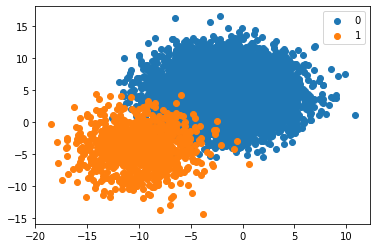

In [ ]:
# define an imbalanced dataset with a 1:100 class ratio
from numpy import unique
from numpy import hstack
from numpy import vstack
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_blobs

# create a dataset with a given class distribution
def get_dataset(proportions):
	# determine the number of classes
	n_classes = len(proportions)
	# determine the number of examples to generate for each class
	largest = max([v for k,v in proportions.items()])
	n_samples = largest * n_classes
	# create dataset
	X, y = make_blobs(n_samples=n_samples, centers=n_classes, n_features=2, random_state=1, cluster_std=3)
	# collect the examples
	X_list, y_list = list(), list()
	for k,v in proportions.items():
		row_ix = where(y == k)[0]
		selected = row_ix[:v]
		X_list.append(X[selected, :])
		y_list.append(y[selected])
	return vstack(X_list), hstack(y_list)

# scatter plot of dataset, different color for each class
def plot_dataset(X, y):
	# create scatter plot for samples from each class
	n_classes = len(unique(y))
	for class_value in range(n_classes):
		# get row indexes for samples with this class
		row_ix = where(y == class_value)[0]
		# create scatter of these samples
		pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(class_value))
	# show a legend
	pyplot.legend()
	# show the plot
	pyplot.show()

# define the class distribution 1:100
proportions = {0:10000, 1:1000}
# generate dataset
X, y = get_dataset(proportions)
# summarize class distribution:
major = (len(where(y == 0)[0]) / len(X)) * 100
minor = (len(where(y == 1)[0]) / len(X)) * 100
print('Class 0: %.3f%%, Class 1: %.3f%%' % (major, minor))
# plot dataset
plot_dataset(X, y)

In [ ]:
# evaluate a majority class classifier on an 1:100 imbalanced dataset
from numpy import mean
from numpy import hstack
from numpy import vstack
from numpy import where
from sklearn.datasets import make_blobs
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# create a dataset with a given class distribution
def get_dataset(proportions):
	# determine the number of classes
	n_classes = len(proportions)
	# determine the number of examples to generate for each class
	largest = max([v for k,v in proportions.items()])
	n_samples = largest * n_classes
	# create dataset
	X, y = make_blobs(n_samples=n_samples, centers=n_classes, n_features=2, random_state=1, cluster_std=3)
	# collect the examples
	X_list, y_list = list(), list()
	for k,v in proportions.items():
		row_ix = where(y == k)[0]
		selected = row_ix[:v]
		X_list.append(X[selected, :])
		y_list.append(y[selected])
	return vstack(X_list), hstack(y_list)

# evaluate a model using repeated k-fold cross-validation
def evaluate_model(X, y, metric):
	# define model
	model = DummyClassifier(strategy='most_frequent')
	# evaluate a model with repeated stratified k fold cv
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
	return scores

# define the class distribution 1:100
proportions = {0:10000, 1:1000}
# generate dataset
X, y = get_dataset(proportions)
# summarize class distribution:
major = (len(where(y == 0)[0]) / len(X)) * 100
minor = (len(where(y == 1)[0]) / len(X)) * 100
print('Class 0: %.3f%%, Class 1: %.3f%%' % (major, minor))
# evaluate model
scores = evaluate_model(X, y, 'accuracy')
# report score
print('Accuracy: %.3f%%' % (mean(scores) * 100))

Class 0: 90.909%, Class 1: 9.091%
Accuracy: 90.909%


In [1]:
# calculates precision for 1:100 dataset with 90 tp and 30 fp
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(100)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(10)] + [1 for _ in range(90)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
# calculate prediction
precision = precision_score(y_true, y_pred, average='binary')
print('Precision: %.3f' % precision)

Precision: 0.750
